In [22]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dill
import matplotlib.font_manager as fm

font_path = '../figs/result/SimHei.ttf'  # 这里替换成你系统中的中文字体路径
plt.rc('font', family='SimHei', size=13)
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
from matplotlib.pyplot import MultipleLocator

In [23]:
light_blue = '#82B0D2'
light_red = '#FA7F6F'
dark_blue = '#2878b5'
dark_red = '#c82423'
dark_green = '#54B345'

## pretrain process
#### dap  prc:0.831 loss:0.458
#### nsp  prc:0.8081 loss:3928
#### mlm  jaccard: prc

#### Jaccard: 0.9158, PRAUC: 0.9904, AVG_PRC: 0.9413, AVG_RECALL: 0.9705
#### DISEASE Jaccard: 0.9265, PRAUC: 0.9964, AVG_PRC: 0.9301, AVG_RECALL: 0.9956
#### Patient Evaluation  Jaccard: 0.9378, PRAUC: 0.9974, AVG_PRC: 0.9388, AVG_RECALL: 0.9987
#### SYMPTOM Jaccard: 0.8832, PRAUC: 0.9776, AVG_PRC: 0.955, AVG_RECALL: 0.9174

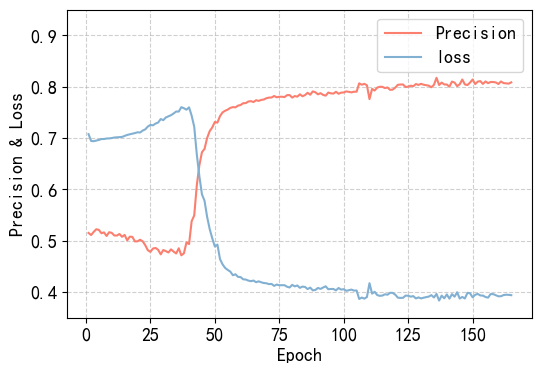

In [29]:
import re
import matplotlib.pyplot as plt
root = '../src/log/Med/MTKMed/'

''' nsp '''
dir = ['log1_', 'log2_', 'log3_', 'log6_']
prc = []
loss = []
for elem in dir:
    with open (os.path.join(root, elem, elem+'.log'), 'r', encoding='utf-8') as f:
        for line in f.readlines():
            if line.find('INFO - Epoch') >= 0:
                match = re.search(r'prc:\s([\d.]+).*?Validation Loss_nsp:\s([\d.]+)', line)
                prc.append(float(match.group(1)))
                loss.append(float(match.group(2)))

# with open("output.txt", "w", encoding="utf-8") as file:
#     file.write('prc,loss')
#     for item1, item2 in zip(prc,loss):
#         file.write(str(item1) + "," + str(item2) + "\n")

prc = [prc[i] for i in range(len(prc)) if i % 10 == 0]
loss = [loss[i] for i in range(len(loss)) if i % 10 == 0]

# some changes
core = 1
prc_add = 0.08
loss_sub = 0.2
for i in range(len(prc)):
    if 40 <= i <= 50:
        prc[i] += (i - 40)  * prc_add / 10
        loss[i] -= (i - 40) * loss_sub / 10

    if i > 50:
        prc[i] += prc_add
        loss[i] -= loss_sub

for i in range(len(prc)):
    if 45 <= i <= 55:
        prc[i] -= 0.02 / (np.abs(i - 50) + 1)
        loss[i] += 0.05 / (np.abs(i - 50) + 1)

best_prc = 0.7281 + prc_add
best_loss = 0.5928 - loss_sub

tail_len = 30
decay_factor = np.linspace(1, 0.2, tail_len)  # 震荡幅度从 1 渐变到 0.2

prc_tail = best_prc + (np.random.uniform(-0.01, 0.01, tail_len) * decay_factor)
loss_tail = best_loss + (np.random.uniform(-0.01, 0.01, tail_len) * decay_factor)

prc.extend(prc_tail)
loss.extend(loss_tail)

epochs = list(range(1, len(prc) + 1, 1))

# 绘制折线图
plt.figure(figsize=(6, 4))
plt.plot(epochs, prc, linestyle='-', label='Precision', color=light_red)
plt.plot(epochs, loss, linestyle='-', label='loss', color=light_blue)

# 设置标签和标题
plt.xlabel("Epoch")
plt.ylabel("Precision & Loss")
plt.ylim(0.35, 0.95)
plt.legend(loc='upper right')
plt.grid(True, linestyle="--", alpha=0.6)
# plt.title('序列匹配预训练过程中Precision和Loss变化折线图')
plt.savefig('../figs/result/pretrain_nsp.pdf', dpi=1000)
plt.show()

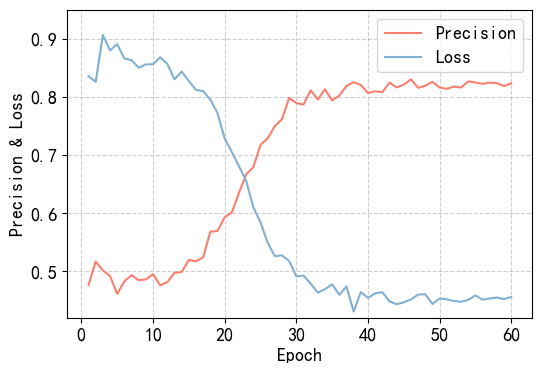

In [35]:
# domain adaption pretain
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)

# 生成 epoch 数
epochs = np.arange(1, 61)

# 前5个epoch的不规律波动
np.random.seed(42)
precision = np.random.uniform(0.45, 0.52, 5)
loss = np.random.uniform(0.82, 0.92, 5)

# 第6-39个epoch，precision快速上升后逐渐变缓，loss快速下降后逐渐变缓
epoch_range = np.linspace(-5, 5, 34)
precision_growth = 0.485 + (0.336 / (1 + np.exp(-epoch_range))) + np.random.normal(0, 0.01, 34)
loss_decline = 0.87 - (0.417 / (1 + np.exp(-epoch_range))) + np.random.normal(0, 0.01, 34)

# 39-59 epoch，围绕0.821和0.453震荡，震荡幅度先大后小
decay_factor = np.linspace(1, 0.2, 21)
precision_stable = 0.821 + (np.random.uniform(-0.015, 0.015, 21) * decay_factor)
loss_stable = 0.453 + (np.random.uniform(-0.015, 0.015, 21) * decay_factor)

# 合并数据
precision = np.concatenate([precision, precision_growth, precision_stable])
loss = np.concatenate([loss, loss_decline, loss_stable])

# 绘制曲线
plt.figure(figsize=(6, 4))
plt.plot(epochs, precision, label='Precision', color=light_red)
plt.plot(epochs, loss, label='Loss', color=light_blue)
plt.xlabel('Epoch')
plt.ylabel('Precision & Loss')
plt.ylim(0.42, 0.95)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
# plt.title('领域对齐预训练过程中Precision和Loss变化折线图')
plt.savefig('../figs/result/pretrain_dap.pdf', dpi=1000)
plt.show()


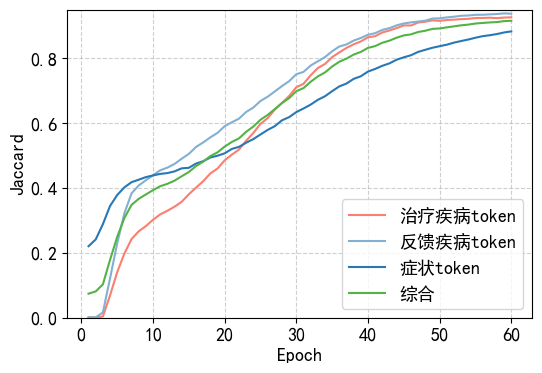

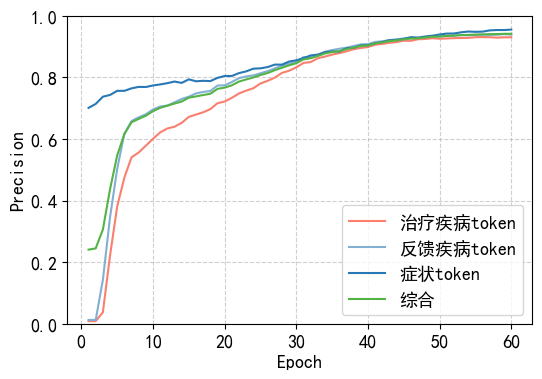

In [31]:
import re
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False
root = '../src/log/Med/MTKMed/'
''' srp '''
dir = 'log9_'
total = [[], []] # jaccard prc
disease = [[], []]
evaluation = [[], []]
symptom = [[], []]

with open (os.path.join(root, dir, dir + '.log'), 'r', encoding='utf-8') as f:
    for line in f.readlines():
        match = re.search(r'Jaccard:\s([\d.]+).*?AVG_PRC:\s([\d.]+)', line)
        if match:
            disease_catch = re.search(r'DISEASE Jaccard:\s([\d.]+).*?AVG_PRC:\s([\d.]+)', line)
            evaluation_catch = re.search(r'Patient Evaluation  Jaccard:\s([\d.]+).*?AVG_PRC:\s([\d.]+)', line)
            symptom_catch = re.search(r'SYMPTOM Jaccard:\s([\d.]+).*?AVG_PRC:\s([\d.]+)', line)
            if disease_catch:
                disease[0].append(float(match.group(1)))
                disease[1].append(float(match.group(2)))
            elif evaluation_catch:
                evaluation[0].append(float(match.group(1)))
                evaluation[1].append(float(match.group(2)))
            elif symptom_catch:
                symptom[0].append(float(match.group(1)))
                symptom[1].append(float(match.group(2)))
            else:
                total[0].append(float(match.group(1)))
                total[1].append(float(match.group(2)))

epochs = list(range(1, len(total[0]) + 1, 1))

# 绘制折线图
# jaccard
plt.figure(figsize=(6, 4))
plt.plot(epochs, disease[0], linestyle='-', label='治疗疾病token', color=light_red)
plt.plot(epochs, evaluation[0], linestyle='-', label='反馈疾病token', color=light_blue)
plt.plot(epochs, symptom[0], linestyle='-', label='症状token', color=dark_blue)
plt.plot(epochs, total[0], linestyle='-', label='综合', color=dark_green)

# 设置标签和标题
plt.xlabel("Epoch")
plt.ylabel("Jaccard")
plt.ylim(0, 0.95)
plt.legend(loc='lower right')
plt.grid(True, linestyle="--", alpha=0.6)
# plt.title('掩码自重建预训练过程中不同token信息Jaccard变化折线图')
plt.savefig('../figs/result/pretrain_mlm_jaccard.pdf', dpi=1000)
plt.show()


# 绘制折线图
# prc
plt.figure(figsize=(6, 4))
plt.plot(epochs, disease[1], linestyle='-', label='治疗疾病token', color=light_red)
plt.plot(epochs, evaluation[1], linestyle='-', label='反馈疾病token', color=light_blue)
plt.plot(epochs, symptom[1], linestyle='-', label='症状token', color=dark_blue)
plt.plot(epochs, total[1], linestyle='-', label='综合', color=dark_green)

# 设置标签和标题
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.grid(True, linestyle="--", alpha=0.6)
# plt.title('掩码自重建预训练过程中不同token信息Precision变化折线图')
plt.savefig('../figs/result/pretrain_mlm_precision.pdf', dpi=1000)
plt.show()

## model performance

## ablation

## sensitivity

# fig1

In [25]:
def plot_clinical_occurrence(a, b):
    fig, ax1 = plt.subplots()
    ax1.set_yscale("log")
    # 绘制第一条线
    ax1.plot(a, color='blue')
    ax1.set_ylabel('# Occurrence in MIMIC-IV', fontname='Times New Roman', fontsize=12)
    ax1.set_xlabel('Disease code ID', color='blue', fontname='Times New Roman', fontsize=12)
    ax1.tick_params(axis='x', colors='blue')
    # 创建与第一条线共享x轴的第二个坐标轴
    ax2 = ax1.twiny()
    ax2.set_yscale("log")
    # 绘制第二条线
    ax2.plot(b, color='red')
    ax2.set_xlabel('Procedure code ID', color='red', fontname='Times New Roman', fontsize=12)
    ax2.tick_params(axis='x', colors='red')
    plt.show()

In [26]:
# a = diag_pd['ICD_CODE'].value_counts().values
# b = proc_pd['ICD_CODE'].value_counts().values

/var/folders/0t/trwqpsf9681dm8sgzhh6cwzm0000gn/T/ipykernel_62782/3091026320.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(methods, rotation=40)


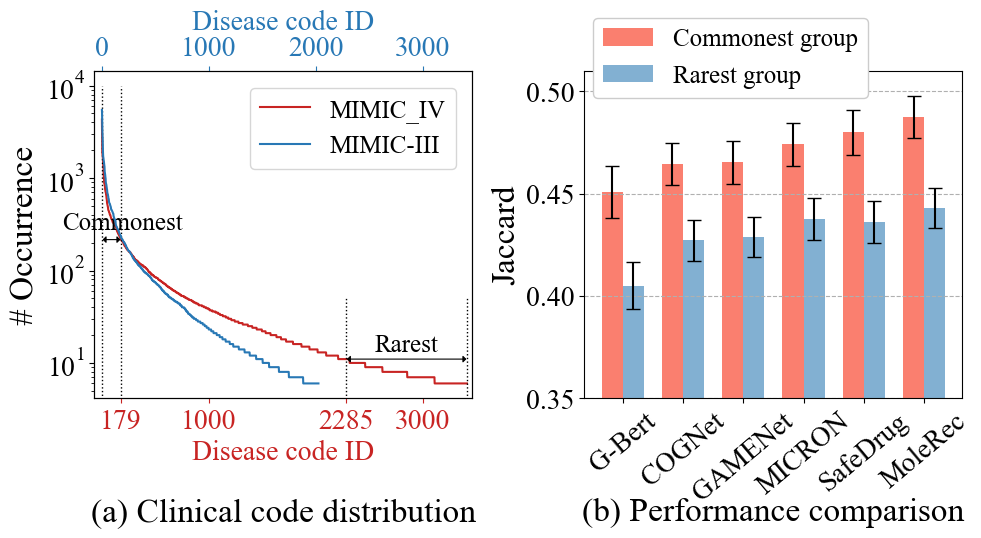

In [326]:
fontsize1 = 20+4
fontsize2 = 16+4
fontsize3 = 14+4
# ------------------------ mimiv-iii and mimic-iv diagnosis code distribution ------------------------
a = dill.load(open('output/mimic-iii/a.pkl', 'rb'))
a4 = dill.load(open('output/mimic-iv/a.pkl', 'rb'))

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10, 6.5))  # 创建1行2列的子图，当前绘制第1个子图
ax1 = ax2.twiny()
ax1.set_yscale("log")
# 绘制第一条线
ax1.plot(a, color=dark_blue, label='MIMIC-III')
# ax1.vlines(x=179, ymin=0, ymax=1500, colors='black', ls=':', lw=1)
# x_s = [0, 179, 1000, 2000]
# ax1.set_xticks(x_s, [str(i) for i in x_s])
ax1.set_xlim(-70, len(a4)+50)
ax2.set_ylabel('# Occurrence', fontname='Times New Roman', fontsize=fontsize1)
ax1.set_xlabel('Disease code ID', color=dark_blue, fontname='Times New Roman', fontsize=fontsize2)
ax1.tick_params(axis='x', colors=dark_blue, labelsize=fontsize2)
ax1.tick_params(axis='y', labelsize=fontsize2)
ax2.tick_params(axis='y', labelsize=fontsize2)
# 创建与第一条线共享x轴的第二个坐标轴
ax2.set_yscale("log")
# 绘制第二条线
ax2.plot(a4, color=dark_red, label='MIMIC_IV')
x1 = 179
y1 = a4[x1]
ax2.annotate('', xy=(x1+20, y1), xytext=(0-20, y1), arrowprops=dict(arrowstyle = '<|-|>, head_width=0.13, head_length=0.13', color = 'k', linewidth = 0.8),
                    fontproperties = 'Times New Roman', size = 15) 
# ax2.hlines(y=y1, xmin=0, xmax=x1, colors='black', ls=':', lw=1)
ax2.vlines(x=0, ymin=0, ymax=10000, colors='black', ls=':', lw=1)
ax2.vlines(x=x1, ymin=0, ymax=10000, colors='black', ls=':', lw=1)
ax2.text(x1+10, y1+25, 'Commonest', ha='center', va='bottom', fontsize=fontsize3, fontname='Times New Roman')
x2 = len(a4)-1130
y2=a4[x2]
# ax2.hlines(y=y2, xmin=x2, xmax=len(a4), colors='black', ls=':', lw=1)
ax2.vlines(x=x2, ymin=0, ymax=50, colors='black', ls=':', lw=1)
ax2.vlines(x=len(a4), ymin=0, ymax=50, colors='black', ls=':', lw=1)
ax2.annotate('', xy=(x2-20, y2), xytext=(len(a4)+20, y2), arrowprops=dict(arrowstyle = '<|-|>, head_width=0.13, head_length=0.13', color = 'k', linewidth = 0.8),
                    fontproperties = 'Times New Roman', size = 15) 
ax2.text((x2+len(a4))/2, y2+0.5, 'Rarest', ha='center', va='bottom', fontsize=fontsize3, fontname='Times New Roman')
x_s = [179, 1000, x2, 3000]
# x_s = [0, 179, 1000, 2000, x2, 3000]
ax2.set_xticks(x_s, [str(i) for i in x_s])
ax2.set_xlim(-70, len(a4)+50)

ax2.set_xlabel('Disease code ID', color=dark_red, fontname='Times New Roman', fontsize=fontsize2)
ax2.tick_params(axis='x', colors=dark_red, labelsize=fontsize2)
fig.legend(loc='upper left', bbox_to_anchor=(0.245, 0.83), fontsize=fontsize3)
ax2.set_title("(a) Clinical code distribution", loc="center", y=-0.4, fontsize=fontsize1)
# ------------------------ mimiv-iv baseline results in g1 and g5 --------------------------------
# 准备数据
# jac
GBert           = [0.4508, 0.4491, 0.4365, 0.4045, 0.4051] 
GAMENet         = [0.4653, 0.4481, 0.45, 0.4388, 0.4286] 
SafeDrug        = [0.48, 0.4522, 0.455, 0.4595, 0.436] 
COGNet          = [0.4643, 0.4631, 0.4534, 0.4511, 0.4271] 
MICRON          = [0.4741, 0.4655, 0.4407, 0.4595, 0.4376]
Rebalance       = [0.4647, 0.4589, 0.4483, 0.4519, 0.4405] 
MoleRec = [0.4875, 0.4534, 0.4574, 0.4466, 0.4429]
OurModel        = [0.481, 0.4727, 0.4572, 0.457, 0.4479] 

GBert_se  =   [0.0129, 0.012, 0.0125, 0.0113, 0.0117]
GAMENet_se =    [0.0105, 0.0098, 0.0093, 0.0086, 0.0098]
SafeDrug_se=     [0.0109, 0.0099, 0.009, 0.0091, 0.0102]
COGNet_se  = [0.0102, 0.0098, 0.0091, 0.0089, 0.0101]
MICRON_se  =  [0.0104, 0.009, 0.0087, 0.0091, 0.0101]
Rebalance_se= [0.0072, 0.0068, 0.0068, 0.0068, 0.0063]
MoleRec_se = [0.0102, 0.01, 0.0091, 0.0089, 0.0096]
OurModel_se =  [0.0071, 0.007, 0.0069, 0.0068, 0.0063]

methods = ['G-Bert', 'COGNet', 'GAMENet', 'MICRON', 'SafeDrug', 'MoleRec']
x = np.arange(len(methods))  # 创建相邻的位置

group1_width = 0.35  # 第一组柱子的宽度
group5_width = 0.35  # 第二组柱子的宽度

group1_scores = [GBert[0], COGNet[0], GAMENet[0], MICRON[0], SafeDrug[0], MoleRec[0]]
group5_scores = [GBert[-1], COGNet[-1], GAMENet[-1], MICRON[-1], SafeDrug[-1], MoleRec[-1]]
group1_se = [GBert_se[0], COGNet_se[0], GAMENet_se[0], MICRON_se[0], SafeDrug_se[0], MoleRec_se[0]]
group5_se = [GBert_se[-1], COGNet_se[-1], GAMENet_se[-1], MICRON_se[-1], SafeDrug_se[-1], MoleRec_se[-1]]
# 绘制柱状图
ax3.bar(x - group1_width/2, group1_scores, width=group1_width, label='Commonest group', color=light_red, yerr=group1_se, capsize=5)
ax3.bar(x + group5_width/2, group5_scores, width=group5_width, label='Rarest group', color=light_blue, yerr=group5_se, capsize=5)
# 添加标题和标签
ax3.set_title("(b) Performance comparison", loc="center", y=-0.4, fontsize=fontsize1)
ax3.set_ylabel('Jaccard', fontsize=fontsize1)
ax3.legend(loc='upper left', bbox_to_anchor=(-0.01, 1.2), fontsize=fontsize3, framealpha=1)
ax3.set_xticklabels(methods, rotation=40)
# # 设置x轴刻度标签
ax3.set_xticks(x, methods)
ax3.set_ylim(0.35, 0.51)
ax3.tick_params(axis='x', labelsize=fontsize2)
ax3.tick_params(axis='y', labelsize=fontsize2)
# 添加网格线
ax3.grid(axis='y', linestyle='dashed')
# 展示图形
plt.tight_layout()
plt.savefig('output/intro.pdf', dpi=1000)
plt.show()

# fig3

In [30]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
color_list = ['#C0C0C0', '#D8B8D8', '#B8D8E8', '#A8D8B9', '#F7F48B', '#FFDEAD', '#FFA07A', '#F08080']


<BarContainer object of 8 artists>

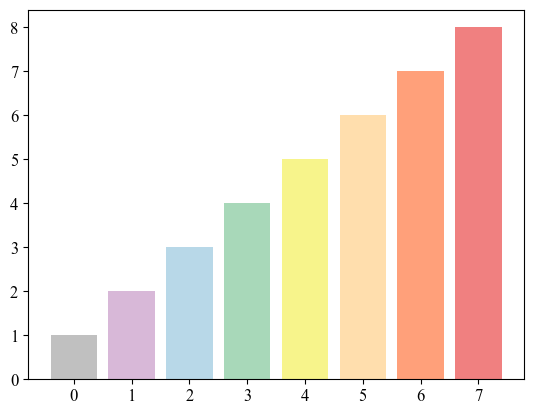

In [29]:
plt.bar(np.arange(len(color_list)), 1+np.arange(len(color_list)), color = color_list)

<BarContainer object of 8 artists>

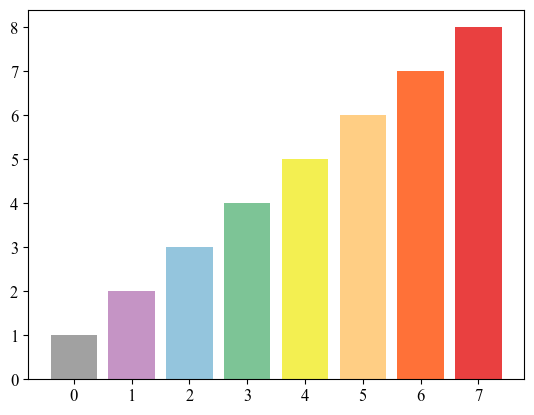

In [31]:
dark_color_list = [lighten_color(c, 1.5) for c in color_list]
plt.bar(np.arange(len(dark_color_list)), 1+np.arange(len(dark_color_list)), color = dark_color_list)

/var/folders/0t/trwqpsf9681dm8sgzhh6cwzm0000gn/T/ipykernel_62782/4278541306.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


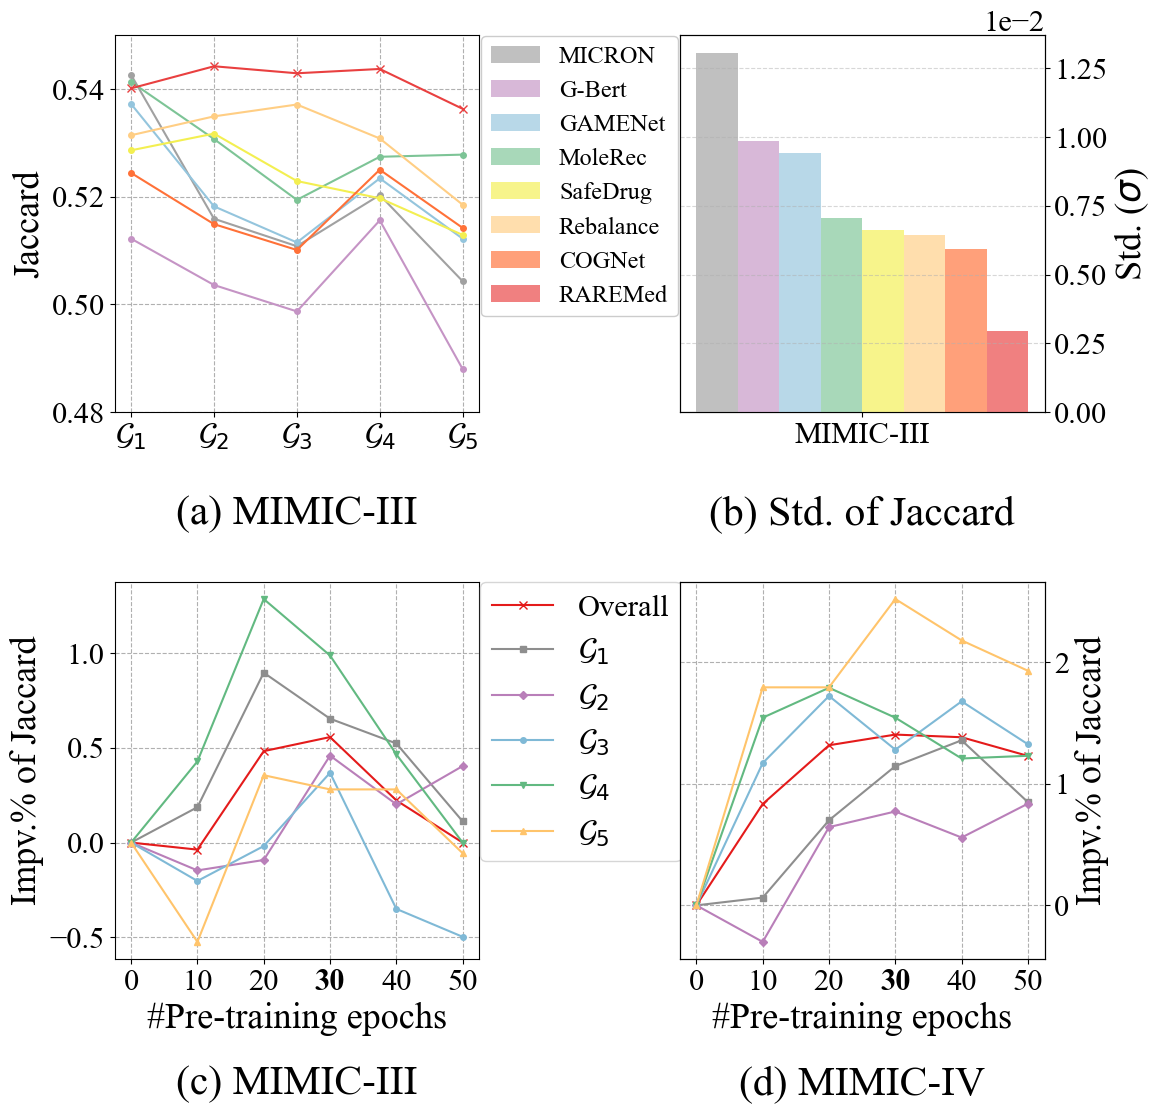

In [339]:
fontsize1 = 30
fontsize2 = 22
fontsize3 = 26

color1 = '#B6B34C'
color2 = '#55C191'
color3 = '#67B6D6'
color4 = '#DB95C6'
color5 = '#FB8A75'
# 准备数据
x = [1, 2, 3, 4, 5]
# ----------------------MIMIC-III group-wise results-------------------------
GBert = [0.5122, 0.5036, 0.4987, 0.5156, 0.488] 
GAMENet = [0.5372, 0.5182, 0.5115, 0.5234, 0.5122] 
SafeDrug = [0.5286, 0.5317, 0.5229, 0.5197, 0.5129] 
COGNet = [0.5244, 0.5149, 0.5101, 0.525, 0.5142] 
MICRON = [0.5426, 0.5159, 0.5108, 0.5203, 0.5043] 
Rebalance = [0.5314, 0.5349, 0.5371, 0.5308, 0.5185] 
OurModel = [0.5401, 0.5442, 0.5429, 0.5437, 0.5363]
MoleRec = [0.5413, 0.5307, 0.5194, 0.5274, 0.5278]

# GBert = [0.5122, 0.5036, 0.4987, 0.5156, 0.488] 
# GAMENet         = [0.5298, 0.517, 0.527, 0.5181, 0.5107] 
# SafeDrug        = [0.5288, 0.5242, 0.5233, 0.5212, 0.5183] 
# COGNet          = [0.5181, 0.5114, 0.5242, 0.5185, 0.5164] 
# MICRON          = [0.5461, 0.5195, 0.5145, 0.5045, 0.5093] 
# Rebalance = [0.5314, 0.5349, 0.5371, 0.5308, 0.5185] 
# OurModel = [0.5401, 0.5442, 0.5429, 0.5437, 0.5363]
# MoleRec         = [0.5398, 0.5231, 0.5344, 0.5214, 0.5279]

GBert_std = [np.std(GBert)]
GAMENet_std = [np.std(GAMENet)]
SafeDrug_std = [np.std(SafeDrug)]
COGNet_std = [np.std(COGNet)]
MICRON_std = [np.std(MICRON)]
Rebalance_std = [np.std(Rebalance)]
OurModel_std = [np.std(OurModel)]
MoleRec_std = [np.std(MoleRec)]

fig, axs = plt.subplots(2, 2, figsize=(12, 12), gridspec_kw={'wspace': 0.55, 'hspace': 0.45})
# fig3a----------------------MIMIC-III group-wise results-------------------------
axs1 = axs[0, 0]
color_list = ['#C0C0C0', '#D8B8D8', '#B8D8E8', '#A8D8B9', '#F7F48B', '#FFDEAD', '#FFA07A', '#F08080']
# 在第一个子图上绘制折线图
axs1.plot(x, MICRON, label='MICRON',       color=dark_color_list[0], marker = 'o', markersize=4)
axs1.plot(x, GBert, label='G-Bert',        color=dark_color_list[1], marker = 'o', markersize=4)
axs1.plot(x, GAMENet, label='GAMENet',     color=dark_color_list[2], marker = 'o', markersize=4)
axs1.plot(x, MoleRec, label='MoleRec',     color=dark_color_list[3], marker = 'o', markersize=4)
axs1.plot(x, SafeDrug, label='SafeDrug',   color=dark_color_list[4], marker = 'o', markersize=4)
axs1.plot(x, Rebalance, label='Rebalance', color=dark_color_list[5], marker = 'o', markersize=4)
axs1.plot(x, COGNet, label='COGNet',       color=dark_color_list[6], marker = 'o', markersize=4)
axs1.plot(x, OurModel, label='RAREMed',    color=dark_color_list[7], marker = 'x', markersize=6)
# for fig3c
best_method = np.maximum(GAMENet, np.maximum(SafeDrug, np.maximum(COGNet, MICRON)))
best_method = np.maximum(best_method, np.maximum(Rebalance, np.maximum(MoleRec, GBert)))
improvement_ratio_III = (OurModel - best_method) / best_method * 100

labels = ['$\mathcal{G}_1$', '$\mathcal{G}_2$', '$\mathcal{G}_3$', '$\mathcal{G}_4$', '$\mathcal{G}_5$']
axs1.set_xticks(x)
axs1.set_xticklabels(labels)
axs1.set_ylabel('Jaccard', fontsize=fontsize3)
axs1.tick_params(labelsize=fontsize2)
axs1.set_ylim(0.48, 0.55)
axs1.grid(linestyle='dashed')
# fig3b----------------------std across groups MIMIC-III-------------------------
x = np.array([1])
width = 0.05
width2 = 0.06
axs2 = axs[0, 1]
axs3 = axs2.twinx()
axs2.set_yticks([])
axs3.bar(1,         MICRON_std[0],    width = width, color=color_list[0], label='MICRON')
axs3.bar(1+width,    GBert_std[0],    width = width, color=color_list[1], label='G-Bert')
axs3.bar(1+2*width, GAMENet_std[0],   width = width, color=color_list[2], label='GAMENet')
axs3.bar(1+3*width, MoleRec_std[0],   width = width, color=color_list[3], label='MoleRec')
axs3.bar(1+4*width, SafeDrug_std[0],  width = width, color=color_list[4] , label='SafeDrug')
axs3.bar(1+5*width, Rebalance_std[0], width = width, color=color_list[5], label='Rebalance')
axs3.bar(1+6*width, COGNet_std[0],    width = width, color=color_list[6], label='COGNet')
axs3.bar(1+7*width, OurModel_std[0],  width = width, color=color_list[7], label='RAREMed')
axs3.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs3.yaxis.get_offset_text().set_fontsize(fontsize2)
axs3.set_ylabel('Std. ($\sigma$)', fontname='Times New Roman', fontsize=fontsize3)
axs3.tick_params(axis='y', labelsize=fontsize2)
axs3.tick_params(axis='y', labelsize=fontsize2)
axs3.set_xticks(x+3.5*width)
axs2.set_xticklabels(['MIMIC-III'], fontsize = fontsize2)
axs3.grid(linestyle='dashed', axis='y', alpha = 0.5)#, color='gray', alpha=0.5, linewidth=1, zorder=0, dashes=(5, 5), dash_capstyle='round', dash_joinstyle='round', drawstyle='default', scalex=True, scaley=True, data=None)
axs3.legend(loc = 'upper right', bbox_to_anchor=(0.028, 1.03), framealpha=1, fontsize=fontsize2-4.5)
# fig3c----------------------MIMIC-III group-wise impro. for diff pretrain epoch-------------------------
axs4 = axs[1, 0] 
p_e0  = [0.5388, 0.5353, 0.5447, 0.543 , 0.5368, 0.5344] 
p_e10 = [0.5386, 0.5363, 0.5439, 0.5419, 0.5391, 0.5316]
p_e20 = [0.5414, 0.5401, 0.5442, 0.5429, 0.5437, 0.5363]
p_e30 = [0.5418, 0.5388, 0.5472, 0.545 , 0.5421, 0.5359] 
p_e40 = [0.54  , 0.5381, 0.5458, 0.5411, 0.5393, 0.5359]
p_e50 = [0.5388, 0.5359, 0.5469, 0.5403, 0.5368, 0.5341]
g0 = [p_e0[0], p_e10[0], p_e20[0], p_e30[0], p_e40[0], p_e50[0]]
g1 = [p_e0[1], p_e10[1], p_e20[1], p_e30[1], p_e40[1], p_e50[1]]
g2 = [p_e0[2], p_e10[2], p_e20[2], p_e30[2], p_e40[2], p_e50[2]]
g3 = [p_e0[3], p_e10[3], p_e20[3], p_e30[3], p_e40[3], p_e50[3]]
g4 = [p_e0[4], p_e10[4], p_e20[4], p_e30[4], p_e40[4], p_e50[4]]
g5 = [p_e0[5], p_e10[5], p_e20[5], p_e30[5], p_e40[5], p_e50[5]]
g0 = (np.array(g0) - p_e0[0]) / p_e0[0] * 100
g1 = (np.array(g1) - p_e0[1]) / p_e0[1] * 100
g2 = (np.array(g2) - p_e0[2]) / p_e0[2] * 100
g3 = (np.array(g3) - p_e0[3]) / p_e0[3] * 100
g4 = (np.array(g4) - p_e0[4]) / p_e0[4] * 100
g5 = (np.array(g5) - p_e0[5]) / p_e0[5] * 100
x = [0, 10, 20, 30, 40, 50]
ddark_list = [lighten_color(c, 1.2) for c in dark_color_list]
col2 = [color5, dark_color_list[4], color1, color2, color3, color4]
col2 = [lighten_color(c, 1.2) for c in col2]
axs4.plot(x, g0, label='Overall',         color=ddark_list[7], marker='x', markersize=5.5)
axs4.plot(x, g1, label='$\mathcal{G}_1$', color=ddark_list[0], marker='s', markersize=5)
axs4.plot(x, g2, label='$\mathcal{G}_2$', color=ddark_list[1], marker='D', markersize=4)
axs4.plot(x, g3, label='$\mathcal{G}_3$', color=ddark_list[2], marker='o', markersize=4)
axs4.plot(x, g4, label='$\mathcal{G}_4$', color=ddark_list[3], marker='v', markersize=5)
axs4.plot(x, g5, label='$\mathcal{G}_5$', color=ddark_list[5], marker='^', markersize=5)
axs4.set_xticks(x)
axs4.set_xticklabels(['0', '10', '20', '30', '40', '50'])
axs4.set_xlabel('#Pre-training epochs', fontsize=fontsize3)
axs4.set_ylabel('Impv.% of Jaccard', fontsize=fontsize3)
axs4.tick_params(labelsize=fontsize2)
axs4.grid(linestyle='dashed')
axs4.get_xticklabels()[3].set_weight("bold")
axs4.legend(loc='upper left', bbox_to_anchor=(0.96, 1.04), fontsize=fontsize2)
# fig3d----------------------MIMIC-IV pretrain epoch-------------------------
axs5 = axs[1, 1]
axs5.set_yticks([])
axs6 = axs5.twinx()
p_e0  = [0.4561, 0.4719, 0.4666, 0.4534, 0.4475, 0.441] 
p_e10 = [0.4599, 0.4722, 0.4652, 0.4587, 0.4544, 0.4489]
p_e20 = [0.4621, 0.4752, 0.4696, 0.4612, 0.4555, 0.4489]
p_e30 = [0.4625, 0.4773, 0.4702, 0.4592, 0.4544, 0.4521] 
p_e40 = [0.4624, 0.4783, 0.4692, 0.461, 0.4529, 0.4506] 
p_e50 = [0.4617, 0.4759, 0.4705, 0.4594, 0.453, 0.4495] 

g0 = [p_e0[0], p_e10[0], p_e20[0], p_e30[0], p_e40[0], p_e50[0]]
g1 = [p_e0[1], p_e10[1], p_e20[1], p_e30[1], p_e40[1], p_e50[1]]
g2 = [p_e0[2], p_e10[2], p_e20[2], p_e30[2], p_e40[2], p_e50[2]]
g3 = [p_e0[3], p_e10[3], p_e20[3], p_e30[3], p_e40[3], p_e50[3]]
g4 = [p_e0[4], p_e10[4], p_e20[4], p_e30[4], p_e40[4], p_e50[4]]
g5 = [p_e0[5], p_e10[5], p_e20[5], p_e30[5], p_e40[5], p_e50[5]]
g0 = (np.array(g0) - p_e0[0]) / p_e0[0] * 100
g1 = (np.array(g1) - p_e0[1]) / p_e0[1] * 100
g2 = (np.array(g2) - p_e0[2]) / p_e0[2] * 100
g3 = (np.array(g3) - p_e0[3]) / p_e0[3] * 100
g4 = (np.array(g4) - p_e0[4]) / p_e0[4] * 100
g5 = (np.array(g5) - p_e0[5]) / p_e0[5] * 100

x = [0, 10, 20, 30, 40, 50]
axs6.plot(x, g0, label='Overall',         color=ddark_list[7], marker='x', markersize=5.5)
axs6.plot(x, g1, label='$\mathcal{G}_1$', color=ddark_list[0], marker='s', markersize=5)
axs6.plot(x, g2, label='$\mathcal{G}_2$', color=ddark_list[1], marker='D', markersize=4)
axs6.plot(x, g3, label='$\mathcal{G}_3$', color=ddark_list[2], marker='o', markersize=4)
axs6.plot(x, g4, label='$\mathcal{G}_4$', color=ddark_list[3], marker='v', markersize=5)
axs6.plot(x, g5, label='$\mathcal{G}_5$', color=ddark_list[5], marker='^', markersize=5)
axs6.set_xticks(x)
axs6.set_xticklabels(['0', '10', '20', '30', '40', '50'])
axs6.set_ylabel('Impv.% of Jaccard', fontsize=fontsize3)
axs6.tick_params(labelsize=fontsize2)
axs5.tick_params(labelsize=fontsize2)
axs5.get_xticklabels()[3].set_weight("bold")
axs5.set_xlabel('#Pre-training epochs', fontsize=fontsize3)
axs5.grid(linestyle='dashed')
axs6.grid(linestyle='dashed')

# 设置子图标题
axs1.set_title("(a) MIMIC-III", loc="center", y=-0.32, fontsize=fontsize1)
axs3.set_title("(b) Std. of Jaccard", loc="center", y=-0.32, fontsize=fontsize1)
axs4.set_title("(c) MIMIC-III", loc="center", y=-0.38, fontsize=fontsize1)
axs6.set_title("(d) MIMIC-IV", loc="center", y=-0.38, fontsize=fontsize1)
plt.tight_layout()
plt.savefig('output/group.pdf', dpi=1000, bbox_inches='tight')
plt.show()



# fig4

/var/folders/0t/trwqpsf9681dm8sgzhh6cwzm0000gn/T/ipykernel_62782/4171245388.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


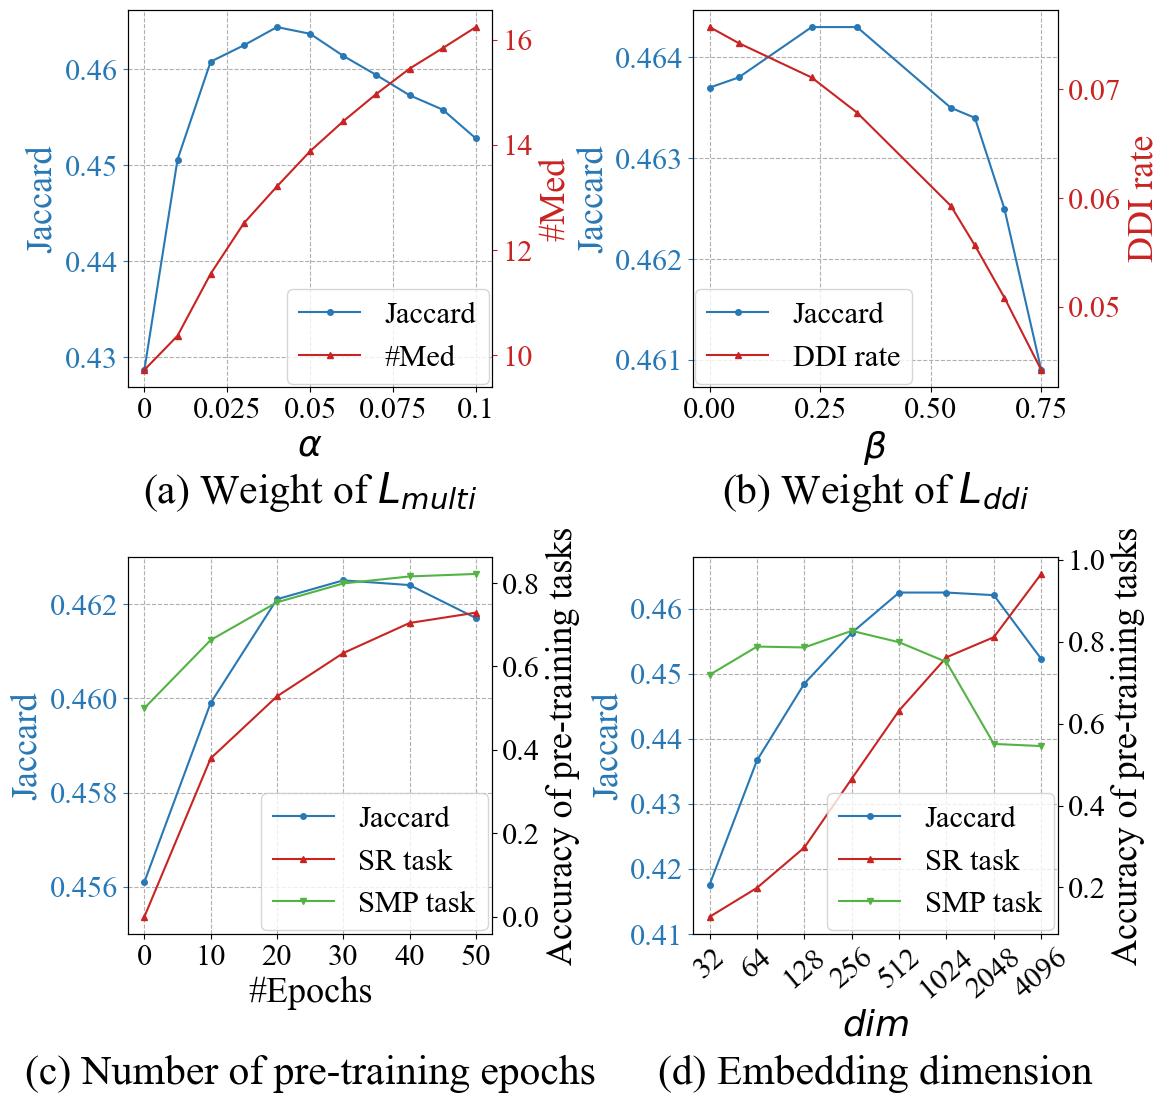

In [333]:
fontsize1 = 30
fontsize2 = 22
fontsize3 = 22
fontsize4 = 26
fig, ax = plt.subplots(2, 2, figsize=(12, 12), gridspec_kw={'wspace': 0.55, 'hspace': 0.45})
ax1, ax3, ax5, ax7 = ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]
# ---------------Subfig1. multi weight-------------------------
x = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
jaccard = [0.4279, 0.4498, 0.46  , 0.4617, 0.4636, 0.4629, 0.4606, 0.4586, 0.4565, 0.455, 0.452] 
jaccard = [ja+0.4625-0.4617 for ja in jaccard]
med_num = [9.951, 10.6, 11.78, 12.74, 13.44, 14.11, 14.68, 15.2, 15.68, 16.07, 16.47]
med_num = [med+12.51-12.74 for med in med_num]
ax1.plot(x, jaccard, label='Jaccard', color=dark_blue, marker='o', markersize=4)
ax2 = ax1.twinx()
ax2.plot(x, med_num, label='#Med', color=dark_red, marker='^', markersize=5)
# 添加标签
ax1.set_xlabel(r'$\alpha$', fontsize=fontsize4)
ax1.set_ylabel('Jaccard', fontsize=fontsize4, color=dark_blue)
ax2.set_ylabel('#Med', fontsize=fontsize4, color=dark_red)
# 设置坐标轴
ax1.set_xticks([0, 0.025, 0.05, 0.075, 0.1], ['0', '0.025', '0.05', '0.075', '0.1'])
ax1.tick_params(axis='x', labelsize=fontsize2)
ax1.tick_params(axis='y', labelsize=fontsize2, color=dark_blue, labelcolor=dark_blue)
ax2.tick_params(axis='y', labelsize=fontsize2, color=dark_red, labelcolor=dark_red)
# ax1.set_yticks(ja_y1, [str(i) for i in ja_y1], rotation=40)
# 添加网格线
ax1.grid(linestyle='dashed')
# 设置图例
fig.legend(loc='upper left', bbox_to_anchor=(0.245, 0.66), fontsize=fontsize3)
# ---------------Subfig2. DDI weight-------------------------
weight = np.array([0, 0.07, 0.3, 0.5, 1.2, 1.5, 2, 3])
x=weight/(weight+1)
jaccard = [0.4633, 0.4634, 0.4632, 0.4639, 0.4634, 0.4639, 0.4639, 0.4631, 0.463 , 0.4621, 0.4605]
jaccard = [ja+0.0004 for i,ja in enumerate(jaccard) if i!=4 and i!=5 and i!=2]
ddi = [0.07485, 0.07338, 0.07287, 0.07021, 0.06888, 0.0678 , 0.06698, 0.05841, 0.05476, 0.04996, 0.0433]
ddi = [ja+0.05084-0.04996 for i,ja in enumerate(ddi) if i!=4 and i!=5 and i!=2]
ax3.plot(x, jaccard, label='Jaccard', color=dark_blue, marker='o', markersize=4)
ax4 = ax3.twinx()
ax4.plot(x, ddi, label='DDI rate', color=dark_red, marker='^', markersize=5)
# 添加标签
ax3.set_xlabel(r'$\beta$', fontsize=fontsize4)
ax3.set_ylabel('Jaccard', fontsize=fontsize4, color=dark_blue)
ax4.set_ylabel('DDI rate', fontsize=fontsize4, color=dark_red)
# 设置坐标轴
# ax4.set_yticks(ddi_y, [str(i) for i in ddi_y], rotation=40)
ax3.set_xticks([0, 0.25, 0.5, 0.75], ['0.00', '0.25', '0.50', '0.75'])
ax3.tick_params(axis='x', labelsize=fontsize2)
ax3.tick_params(axis='y', labelsize=fontsize2, color=dark_blue, labelcolor=dark_blue)
ax4.tick_params(axis='y', labelsize=fontsize2, color=dark_red, labelcolor=dark_red)
# 添加网格线
ax3.grid(linestyle='dashed')
# ax3.set_yticks(ja_y, [str(i) for i in ja_y], rotation=40)
# 设置图例
fig.legend(handles=[ax3.lines[0], ax4.lines[0]], loc='upper left', bbox_to_anchor=(0.585, 0.66), fontsize=fontsize3)
# ---------------Subfig3. pretrain epochs-------------------------
# 三条线 药物推荐和两个预训练任务的精度
x = [0, 10, 20, 30, 40, 50]
jaccard = [0.4561, 0.4599, 0.4621, 0.4625, 0.4624, 0.4617]
pair_matching = [0.5, 0.6632, 0.7536, 0.7988, 0.8156, 0.8216]
reconstruction = [0, 0.3796, 0.5282, 0.6320, 0.7041, 0.7288]

ax5.plot(x, jaccard, label='Jaccard', color=dark_blue, marker='o', markersize=4)
ax6 = ax5.twinx()
ax6.plot(x, reconstruction, label='SR task', color=dark_red, marker='^', markersize=5)
ax6.plot(x, pair_matching, label='SMP task', color=dark_green, marker = 'v', markersize=5)
ax5.set_ylim(0.455, 0.463)
# 添加标签
ax5.set_xlabel('#Epochs', fontsize=fontsize4)
ax5.set_ylabel('Jaccard', fontsize=fontsize4, color=dark_blue)
ax6.set_ylabel('Accuracy of pre-training tasks', fontsize=fontsize4)
# 设置坐标轴
ax5.set_xticks(x, ['0', '10', '20', '30', '40', '50'])
ax5.tick_params(axis='x', labelsize=fontsize2)
ax5.tick_params(axis='y', labelsize=fontsize2, color=dark_blue, labelcolor=dark_blue)
ax6.tick_params(axis='y', labelsize=fontsize2)
# 添加网格线
ax5.grid(linestyle='dashed')
# 设置图例
fig.legend(handles=[ax5.lines[0], ax6.lines[0], ax6.lines[1]], loc='upper left', bbox_to_anchor=(0.223, 0.24), fontsize=fontsize3)
# ---------------Subfig4. embedding dimension-------------------------
x = np.arange(8)
jaccard = [0.4172, 0.4363, 0.4481, 0.4559, 0.4621, 0.4621, 0.4617, 0.4519]
jaccard = [ja+0.4625-0.4621 for ja in jaccard]
pair_matching = [0.6741, 0.7431, 0.7409, 0.7815, 0.7536, 0.7053, 0.5053, 0.5000]
pair_matching = [pm+0.7988 -0.7536 for pm in pair_matching]
reconstruction = [0.0244, 0.0951, 0.1937, 0.3617, 0.5282, 0.6583, 0.7074, 0.8619]
reconstruction = [re+0.6320 -0.5282 for re in reconstruction]
ax7.plot(x, jaccard, label='Jaccard', color=dark_blue, marker='o', markersize=4)
ax8 = ax7.twinx()
ax8.plot(x, reconstruction, label='SR task', color=dark_red, marker='^', markersize=5)
ax8.plot(x, pair_matching, label='SMP task', color=dark_green, marker = 'v', markersize=5)
ax7.set_ylim(0.41, 0.468)
# 添加标签
ax7.set_xlabel('$dim$', fontsize=fontsize4)
ax7.set_ylabel('Jaccard', fontsize=fontsize4, color=dark_blue)
ax8.set_ylabel('Accuracy of pre-training tasks', fontsize=fontsize4)
# # 设置坐标轴
ax7.set_xticks(x, ['32', '64', '128', '256', '512', '1024', '2048', '4096'], rotation=40)
ax7.tick_params(axis='x', labelsize=fontsize2)
ax7.tick_params(axis='y', labelsize=fontsize2, color=dark_blue, labelcolor=dark_blue)
ax8.tick_params(axis='y', labelsize=fontsize2)
# 添加网格线
ax7.grid(linestyle='dashed')
# ax7.set_ylim(0.42, 0.468)
# ax8.set_ylim(0.42, 0.465)
# 设置图例
fig.legend(handles=[ax7.lines[0], ax8.lines[0], ax8.lines[1]], loc='upper left', bbox_to_anchor=(0.695, 0.24), fontsize=fontsize3)
# ---------------------Figure-----------------------
# 设置子图标题
ax1.set_title("(a) Weight of $L_{multi}$", loc="center", y=-0.33, fontsize=fontsize1)
ax3.set_title("(b) Weight of $L_{ddi}$", loc="center", y=-0.33, fontsize=fontsize1)
ax5.set_title("(c) Number of pre-training epochs", loc="center", y=-0.42, fontsize=fontsize1)
ax7.set_title("(d) Embedding dimension", loc="center", y=-0.42, fontsize=fontsize1)
# 调整子图之间的间距
plt.tight_layout()
plt.savefig('output/params.pdf', dpi=1000, bbox_inches='tight')
# 显示图形
plt.show()

# fig6

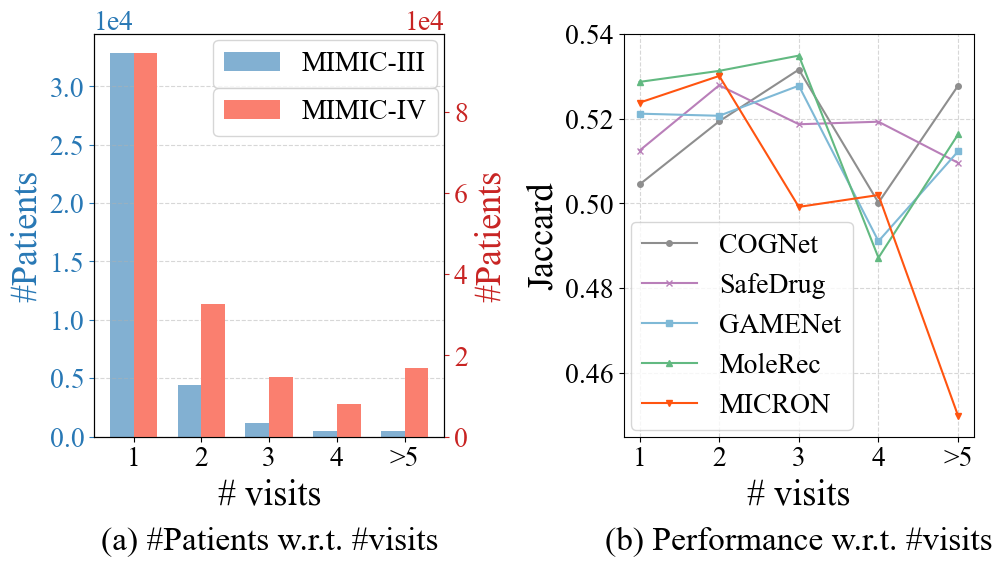

In [334]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

color1 = '#B6B34C'
color2 = '#55C191'
color3 = '#67B6D6'
color4 = '#DB95C6'
color5 = '#FFA07A'

fontsize1 = 26
fontsize2 = 20
fontsize3 = 20
data3 = [32845, 4414, 1192, 450, 459]
data4 = [94477, 32597, 14773, 7945, 16932]

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 6))  # 创建1行2列的子图，当前绘制第1个子图

x_label = ['1', '2', '3', '4', '>5']
# game_mean = [0.5235, 0.5225, 0.5282, 0.4936, 0.5037]
# game_std = [0.1231,0.09036,0.08032,0.06912,0.05835]
# mir_mean = [0.5269,0.5299,0.498, 0.5067,0.4504]
# mir_std = [0.1369, 0.09349,0.07438, 0.06652, 0.05569]
# cog_mean = [0.5118, 0.5204, 0.5304, 0.5049, 0.5283]
# cog_std = [0.1311,0.09569,0.08691,0.06425,0.06217]
# safe_mean = [0.5038,0.5248,0.5144,0.5029,0.5092]
# safe_std = [0.1338,0.09136,0.07352,0.0724,0.05633]
# 准备数据
methods = range(1, 6)
x = np.arange(len(methods))  # 创建相邻的位置
group1_width = 0.35  # 第一组柱子的宽度
group5_width = 0.35  # 第二组柱子的宽度
# 绘制柱状图
ax1.bar(x - group1_width/2, data3, width=group1_width, label='MIMIC-III', color=light_blue)
ax2 = ax1.twinx()
ax2.bar(x + group5_width/2, data4, width=group5_width, label='MIMIC-IV', color=light_red)

# 添加标题和标签
ax1.set_title("(a) #Patients w.r.t. #visits", loc="center", y=-0.3, fontsize=fontsize1-2)
# ax1.set_title("(a) Distribution of #visits", loc="center", y=-0.3, fontsize=fontsize1)
ax1.set_xlabel('# visits', fontsize=fontsize1)
ax1.set_ylabel('#Patients', fontsize=fontsize1, color=dark_blue)
ax2.set_ylabel('#Patients', fontsize=fontsize1, color=dark_red)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-1, 2))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-1, 2))
ax2.yaxis.get_offset_text().set_fontsize(fontsize2)
ax1.yaxis.get_offset_text().set_fontsize(fontsize2)
# --------
cog_mean = [0.5045, 0.5194, 0.5316, 0.5002, 0.5278]
safe_mean = [0.5125, 0.5279, 0.5187, 0.5193, 0.5096]
game_mean = [0.5212, 0.5207, 0.5278, 0.4911, 0.5123]
mir_mean = [0.5238,0.5301,0.4992,0.502, 0.4499]
gbert_mean = [0.4964, 0.5388, 0.484,  0.4983, 0.5175]
mole_mean = [0.5287, 0.5313, 0.5349, 0.4872, 0.5163]

cog_se = [0.009011,0.004013, 0.007022, 0.01252,0.009896]
safe_se = [0.009176, 0.003626, 0.006535, 0.01036, 0.01069]
game_se =[0.009008, 0.003656, 0.006424, 0.01163, 0.009402]
mir_se = [0.01081, 0.00379, 0.005815,0.008455, 0.007916]
gbert_se = [0.004608, 0.007248,0.01128, 0.01867, 0.01068]
mole_se = [0.008447, 0.003635, 0.005642, 0.0119, 0.01078]
ax3.set_ylabel('Jaccard', fontname='Times New Roman', fontsize=fontsize1)
# ax3.errorbar(x_label, gbert_mean, yerr = gbert_se, color=ddark_list[1], label='G-Bert',   marker='D', markersize=4, fmt='o-', elinewidth=2, capsize=4)
ax3.plot(x_label, cog_mean,   color=ddark_list[0], label='COGNet',   marker='o', markersize=4)
# ax3.plot(x_label, gbert_mean, color=ddark_list[1], label='G-Bert',   marker='D', markersize=4)
ax3.plot(x_label, safe_mean,  color=ddark_list[1], label='SafeDrug', marker='x', markersize=5)
ax3.plot(x_label, game_mean,  color=ddark_list[2], label='GAMENet',  marker='s', markersize=5)
ax3.plot(x_label, mole_mean,  color=ddark_list[3], label='MoleRec',  marker='^', markersize=5)
ax3.plot(x_label, mir_mean,   color=ddark_list[6], label='MICRON',   marker='v', markersize=5)
ax3.grid(linestyle='dashed', alpha=0.5, which='major')
ax3.set_title("(b) Performance w.r.t. #visits", loc="center", y=-0.3, fontsize=fontsize1-2)
ax3.set_xlabel('# visits', fontsize=fontsize1)
ax3.set_ylabel('Jaccard', fontsize=fontsize1)
ax3.set_ylim(0.445, 0.54)
ax3.tick_params(axis='x', labelsize=fontsize2)
ax3.tick_params(axis='y', labelsize=fontsize2)
ax3.tick_params(axis='y', labelsize=fontsize2)

ax1.set_xticks(x, x_label, fontsize=fontsize2)
ax1.tick_params(axis='x', labelsize=fontsize2)
ax1.tick_params(axis='y', labelsize=fontsize2, color=label1, labelcolor=label1)
ax2.tick_params(axis='y', labelsize=fontsize2, color=label2, labelcolor=label2)
ax1.grid(axis='y', linestyle='dashed', alpha=0.5, which='major')
ax2.legend(loc='upper left', bbox_to_anchor=(0.3, 0.9), fontsize=fontsize3)
ax1.legend(loc='upper left', bbox_to_anchor=(0.3, 1.02), fontsize=fontsize3)
ax3.legend(loc='upper left', bbox_to_anchor=(-0.02, 0.568), fontsize=fontsize3)
# ax3.legend(loc='upper left', bbox_to_anchor=(-0.02, 0.6), fontsize=fontsize3-2)
plt.tight_layout()
plt.savefig('output/diff_visit.pdf', dpi=1000)
plt.show()

# fig5

In [12]:
data_file = '../ProcessData/data_process/records_final.pkl'
data = dill.load(open(data_file, 'rb'))

def count_diseases(patient_data):
    diseases_count = []
    for admission in patient_data:
        diseases = admission[0]
        diseases_count.append(len(diseases))
    
    return diseases_count

def count_drugs(patient_data):
    drugs_count = []
    for admission in patient_data:
        drugs = admission[2]
        drugs_count.append(len(drugs))
    
    return drugs_count


def count_procedures(patient_data):
    procedures_count = []
    for admission in patient_data:
        procedures = admission[1]
        procedures_count.append(len(procedures))
    
    return procedures_count
    
def calculate_disease_popularity(data):
    diseases_popularity = {}
    for patient_data in data:
        for admission in patient_data:
            diseases = admission[0]
            for disease in diseases:
                if disease in diseases_popularity:
                    diseases_popularity[disease] += 1
                else:
                    diseases_popularity[disease] = 1
    return diseases_popularity

def calculate_drug_popularity(data):
    drugs_popularity = {}
    for patient_data in data:
        for admission in patient_data:
            drugs = admission[2]
            for drug in drugs:
                if drug in drugs_popularity:
                    drugs_popularity[drug] += 1
                else:
                    drugs_popularity[drug] = 1
    return drugs_popularity

def calculate_patient_disease_popularity(patient_data, popularity):
    patient_disease_popularity = []
    for admission in patient_data:
        diseases = admission[0]
        total_diseases = len(diseases)
        total_popularity = sum(popularity[disease] for disease in diseases)
        patient_disease_popularity.append(min(popularity[disease] for disease in diseases)) # change popularity to min
        # patient_disease_popularity.append(total_popularity / total_diseases)
    
    return patient_disease_popularity

def calculate_patient_drug_popularity(patient_data, popularity):
    patient_drug_popularity = []
    for admission in patient_data:
        drugs = admission[2]
        total_drugs = len(drugs)
        total_popularity = sum(popularity[drug] for drug in drugs)
        patient_drug_popularity.append(min(popularity[drug] for drug in drugs)) # change popularity to min
        # patient_drug_popularity.append(total_popularity / total_drugs)
    
    return patient_drug_popularity

disease_popularity = calculate_disease_popularity(data)
drug_popularity = calculate_drug_popularity(data)
patient_disease_popularity = []
patient_drug_popularity = []
patient_disease_count = []
patient_drug_count = []
patient_procedure_count = []

for patient in data:
    diseases_count = count_diseases(patient)
    patient_disease_count.extend(diseases_count)
    drugs_count = count_drugs(patient)
    patient_drug_count.extend(drugs_count)
    procedures_count = count_procedures(patient)
    patient_procedure_count.extend(procedures_count)
    patient_disease_popularity.extend(calculate_patient_disease_popularity(patient, disease_popularity))
    patient_drug_popularity.extend(calculate_patient_drug_popularity(patient, drug_popularity))




In [13]:
# Sorted by popularity
A = patient_disease_popularity
A2 = patient_drug_popularity
B = patient_disease_count
C = patient_drug_count
D = patient_procedure_count

# Get the sorted indices of list A
sorted_indices = sorted(range(len(A)), key=lambda i: A[i])
# sorted_indices = sorted(range(len(A)), key=lambda i: A[i], reverse=True)

# Sort list A
A = [A[i] for i in sorted_indices]

# Rearrange list B based on the sorted indices
B = [B[i] for i in sorted_indices]
C = [C[i] for i in sorted_indices]
D = [D[i] for i in sorted_indices]
A2 = [A2[i] for i in sorted_indices]

In [14]:
D = np.array(D)
C = np.array(C)
B = np.array(B)
A = np.array(A)
A2 = np.array(A2)

K=9
N = int(len(A) / K)

bar = list(range(0, 250, 20)) + [np.max(A)]
pos = [0]
for i in range(0, len(bar)-1):
    j = np.where((A > bar[i]) & (A <= bar[i+1]))[0]
    # print(j)
    p = max(j)
    # print(p)
    pos.append(p)
print(pos)
print(len(pos))

patient_disease_popularity_group = []
patient_drug_popularity_group = []
patient_disease_count_group = []
patient_drug_count_group = []
patient_procedure_count_group = []
for i in range(0, len(pos)-1):
    patient_disease_popularity_group.append(A[pos[i]:pos[i+1]].mean())
    patient_drug_popularity_group.append(A2[pos[i]:pos[i+1]].mean())
    patient_disease_count_group.append(B[pos[i]:pos[i+1]].mean())
    patient_drug_count_group.append(C[pos[i]:pos[i+1]].mean())
    patient_procedure_count_group.append(D[pos[i]:pos[i+1]].mean())

[0, 6660, 9629, 11277, 12262, 12996, 13450, 13772, 13979, 14231, 14319, 14475, 14511, 14948]
14


In [336]:

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 12), dpi=1000)  # Adjust DPI
from scipy.stats import linregress
# Scatter plot with a fitted line for each subplot
def plot_with_fitted_line(x, y, ax, xlabel, ylabel, title):
    ax.scatter(x, y, s = 15)
    ax.plot(x, y, color = dark_blue)
    x = np.array(x)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    fitted_line = f'Fit line'  # Include equation
    # fitted_line = f'Fit Line: y = {slope:.2f}x + {intercept:.2f}'  # Include equation
    r_squared = f'R-squared = {r_value**2:.2f}'
    ax.plot(x, intercept + slope * x, color = dark_red, label=fitted_line)
    ax.set_xticks(x, ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-220', '220-240', '240+'], rotation=90)
    # ax.tick_params(axis='x', labelsize=1000)
    # ax.tick_params(axis='y', labelsize=30)
    # ax.tick_params(labelsize=20)
    ax.set_title(title, loc="center", y=-0.35, fontsize=21)

    # ax.set_xlabel(title, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20)
    # ax.set_title(title, fontsize = 20)
    ax.legend(loc='upper right', fontsize = 20)  # Adjust legend location
    # ax.text(0.05, 0.9, r_squared, transform=ax.transAxes, fontsize=10)  # Add R-squared
    ax.grid(True)  # Add grid lines
    ax.tick_params(labelsize=10)  # Increase font size for ticks

plot_with_fitted_line(np.array(range(1, len(patient_disease_popularity_group)+1)), patient_disease_count_group, axs[0, 0], 'Disease popularity', 'Disease count', '(a) Disease count w.r.t. disease pop.')
plot_with_fitted_line(np.array(range(1, len(patient_disease_popularity_group)+1)), patient_procedure_count_group, axs[0, 1], 'Disease popularity', 'Procedure count', '(b) Procedure count w.r.t. disease pop.')
plot_with_fitted_line(np.array(range(1, len(patient_disease_popularity_group)+1)), patient_drug_count_group, axs[1, 0], 'Disease popularity', 'Drug count', '(c) Drug count w.r.t. disease pop.')
plot_with_fitted_line(np.array(range(1, len(patient_disease_popularity_group)+1)), patient_drug_popularity_group, axs[1, 1], 'Disease popularity', 'Patient drug pop.', '(d) Drug popularity w.r.t. disease pop.')
axs[0,0].tick_params(axis='x', labelsize=20)
axs[0,0].tick_params(axis='y', labelsize=20)
axs[0,1].tick_params(axis='x', labelsize=20)
axs[0,1].tick_params(axis='y', labelsize=20)
axs[1,0].tick_params(axis='x', labelsize=20)
axs[1,0].tick_params(axis='y', labelsize=20)
axs[1,1].tick_params(axis='x', labelsize=20)
axs[1,1].tick_params(axis='y', labelsize=20)
axs[1,1].legend(loc='lower right', fontsize = 20)  # Adjust legend location
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_fontsize(20)
plt.tight_layout(pad=0.9)
plt.savefig('output/difficulty.pdf', bbox_inches="tight",dpi=1000)  # Save the figure with higher DPI 
plt.show()
